<a href="https://colab.research.google.com/github/LayalDougho/Data-Science-Task1/blob/main/decision_tree_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u> ***(GRIP) - The Sparks Foundation*** </u>

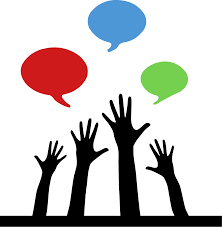

## <strong>Data Science and Business Analytics internship</strong>

# TASK 6 : Prediction using Decision Tree Algorithm

## Objective : If we feed any new data to this classifier, it would be able to predict the right class accordingly


## Author : **Layal Dougho**







### step1 : Importing libraries

In [53]:
# Importing all libraries we need in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


### Step 2: Loading dataset

In [42]:
# Loading the iris dataset
iris = datasets.load_iris()
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [43]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Data visualizations

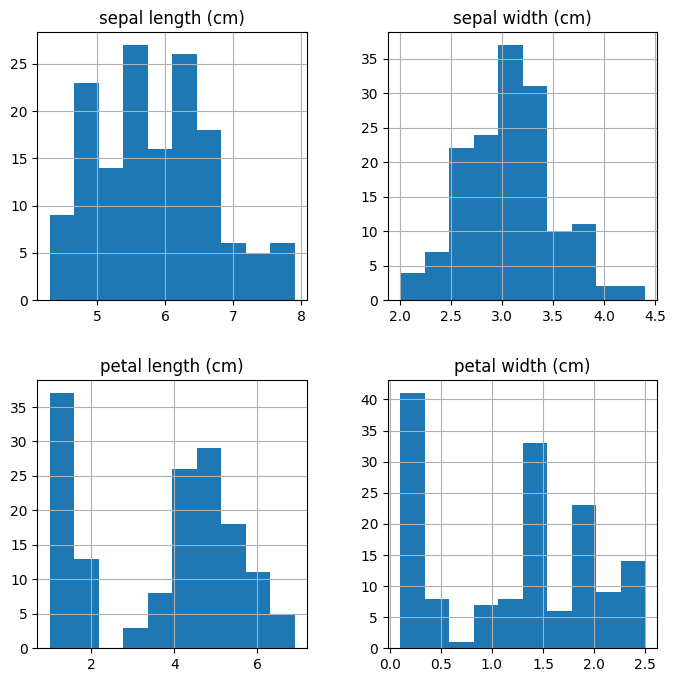

In [44]:
df.hist(figsize=(8,8),)
plt.show()

## Decision Tree Algorithm

### Step 3 : Split the dataset into training and testing sets

In [45]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

### Step 4 : Create decision tree classifier

In [46]:
from numpy.matrixlib.defmatrix import matrix
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
predictions = decision_tree.predict(x_test)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, y_test))

The accuracy of Decision Tree is: 0.9666666666666667


Test accuracy is 97%, hence we can now fit the model for entire data and test for the new data.

In [47]:
confusion_matrix(y_train,decision_tree.predict(x_train))

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]])

In [48]:
confusion_matrix(y_test,decision_tree.predict(x_test))

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

### Step 5 : Visualize the decision tree model



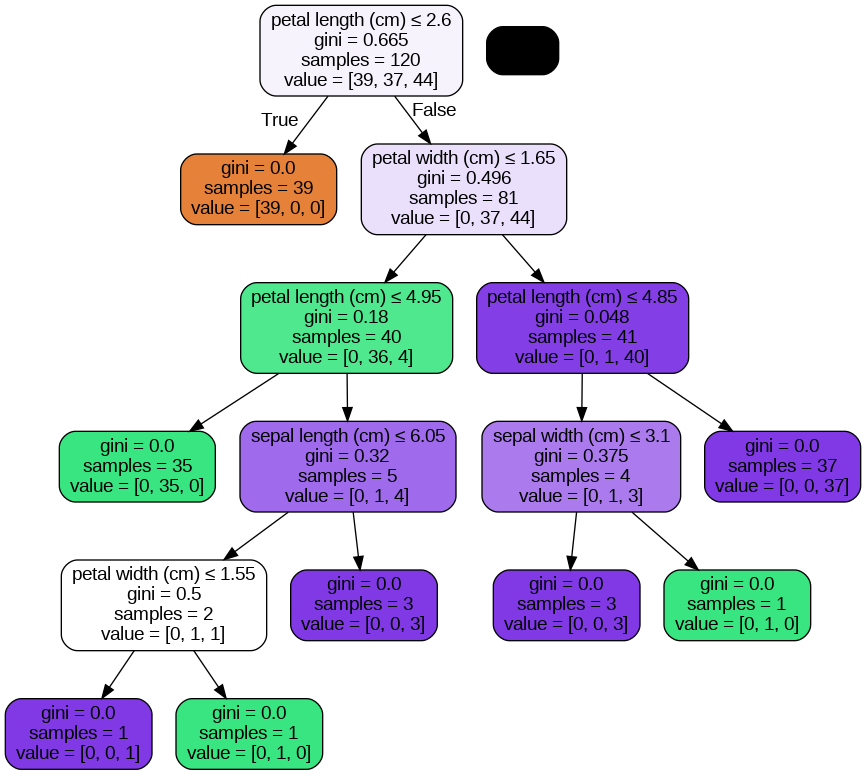

In [49]:
#Visaulizing the tree
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

It is observed thet all theleaf nodes are homogenous

### Step 6: Predicting the values

In [50]:
y_pred=decision_tree.predict(x_test)
y_pred
y_pred=y_pred.reshape(-1,1)

### Step 7: Evaluate the model

In [51]:
# Evaluate the model on the testing data
accuracy = decision_tree.score(x_test, y_test)
accuracy

0.9666666666666667

In [52]:
# Evaluate the model on the testing data
score=decision_tree.score(x_train,y_train)
score


1.0

In [59]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result_df.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

